# 19. Gradient Boosting Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/19.GradientBoostingRegression.ipynb)

In this notebook, we will use a gradient boosted trees model for regression of $({\bf X}, {\bf y})$ data to obtain a function $f({\bf x})$ that best models the labels $y$.

A gradient boosted trees model sequentially adds decision trees to the model to learn the residuals of the model.

To illustrate the behavior of gradient boosting for regression, we will fit a simple one-dimensional function to the same data set that we previously used for linear regression, decision tree regression, and random forest regression.

In [5]:
# Import the numpy, panda, sklearn, and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

### Create a one-dimensional dataset for regression

In [6]:
# Generate a data set for machine learning
np.random.seed(seed=5)
x=np.linspace(0, 2, 300)
x=x+np.random.normal(0,.3,x.shape)
y=np.cos(x)+2*np.sin(x)+3*np.cos(x*2)+np.random.normal(0,1,x.shape)

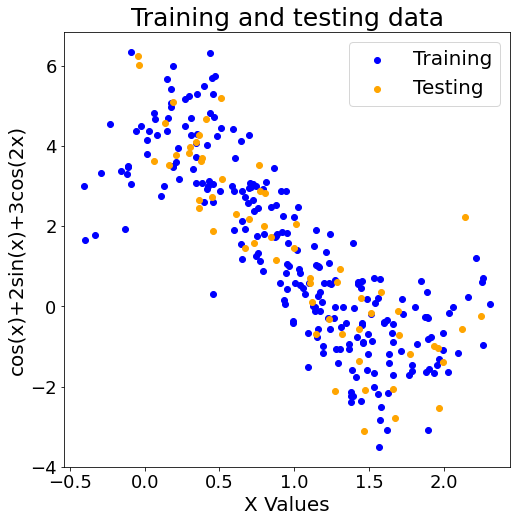

In [7]:
# Split the dataset into 80% for training and 20% for testing
x = x.reshape((x.size,1))
X_train,X_test,y_train,y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

# Plot the training and testing dataset
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(X_train, y_train, color='blue', label='Training')
ax.scatter(X_test, y_test, color='orange', label='Testing')
ax.set_xlabel('X Values',fontsize=20)
ax.set_ylabel('cos(x)+2sin(x)+3cos(2x)',fontsize=20)
ax.set_title('Training and testing data',fontsize=25)
plt.legend(fontsize=20)
plt.show()

### Train Decision Tree Regression Model

In [27]:
# Fitting Decision Tree Regression to the dataset
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

# Regressor score is the coefficient of determination of the prediction
print('Training score =', np.round(regressor.score(X_train,y_train),3))
print('Testing  score =', np.round(regressor.score(X_test,y_test),3))

y_train_pred = regressor.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = regressor.predict(X_test)
testing_mse = mean_squared_error(y_test, y_test_pred)
    
print('Training RMSE = ', np.round(np.sqrt(training_mse),3))
print('Testing  RMSE = ', np.round(np.sqrt(testing_mse),3))

Training score = 0.919
Testing  score = 0.783
Training RMSE =  0.636
Testing  RMSE =  1.089


We get a more similar score on the training and testing data than the previously trained decision tree and random forest models. This indicates that gradient boosted trees are less prone to overfitting. 

Let us visualize the model and data to see the results.

### Visualization of Model Performance

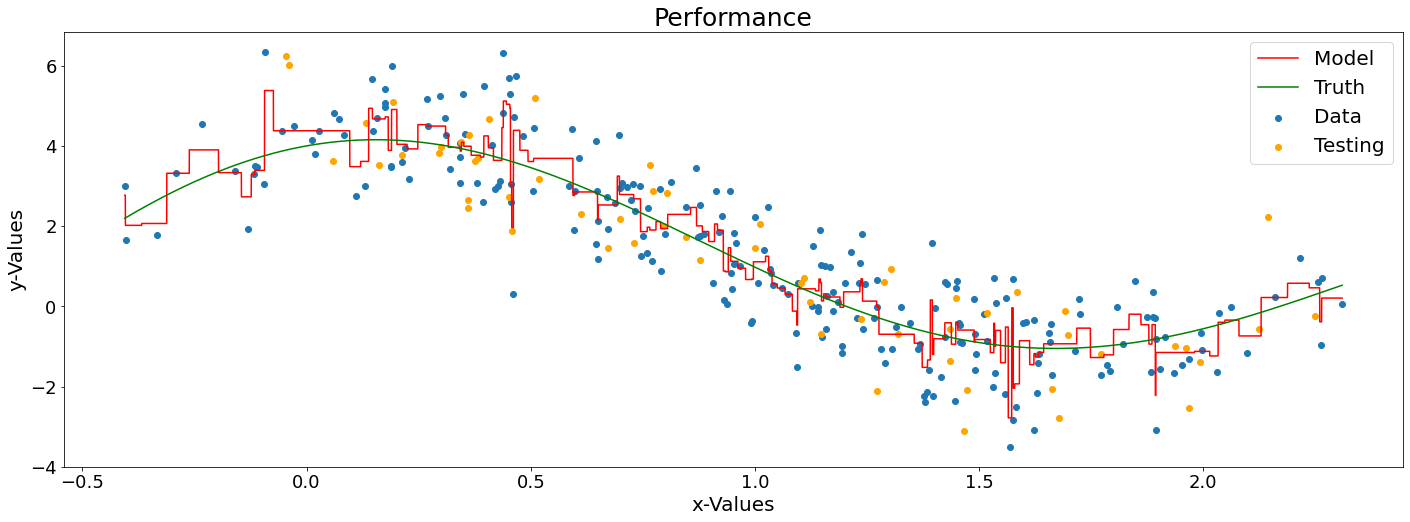

In [28]:
# Calculate results for decision tree regression
X_model = np.linspace(np.min(x), np.max(x), 10000)
X_model = X_model.reshape((X_model.size,1))
y_model_pred = regressor.predict(X_model)
y_truth = np.cos(X_model)+2*np.sin(X_model)+3*np.cos(X_model*2)

# Plot the whole dataset
fig,ax=plt.subplots(figsize=(24,8))
ax.scatter(X_train, y_train, label='Data')
ax.scatter(X_test, y_test, color='orange', label='Testing')
ax.plot(X_model, y_model_pred, color='red', label='Model')
ax.plot(X_model, y_truth, color='green', label='Truth')
ax.set_xlabel('x-Values', fontsize=20)
ax.set_ylabel('y-Values', fontsize=20)
ax.set_title('Performance', fontsize=25)
ax.legend(loc='upper right', fontsize=20)
plt.show()

As for decision tree and random forest models, gradient boosted trees also result in **piecewise constant** models..

Let's check the predicted $y$ and true $y$ values using a scatter plot.

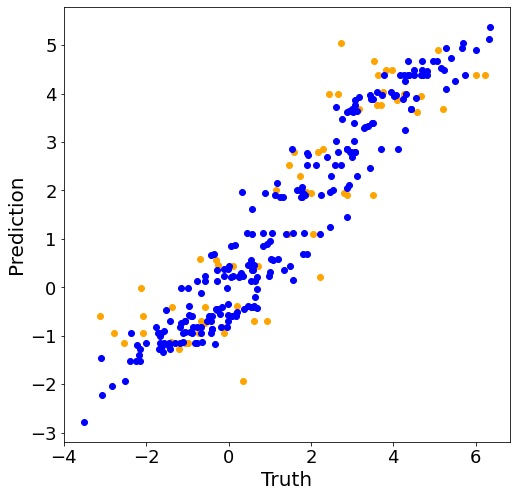

In [29]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(y_test, y_test_pred, color="orange")
ax.scatter(y_train, y_train_pred, color="blue")
ax.set_xlabel('Truth', fontsize=20)
ax.set_ylabel('Prediction', fontsize=20)
plt.show()

### Hyperparameter Optimization with Cross-Validation

To address overfitting, we should optimize the hyperparameters for gradient boosted trees.

The two main hyperparameters for gradient boosted trees are the 
`learning rate` and `n_estimators`.

1. The `learning rate` is usually denoted as α.
   - It determines how fast the model learns. Each tree added modifies the overall model. The learning rate modifies the magnitude of the modification.
   - The lower the learning rate, the slower the model learns. The advantage of slower learning rate is that the model becomes more robust and generalized. In statistical learning, models that learn slowly perform better.
   - However, learning slowly comes at a cost. It takes more time to train the model which brings us to the other significant hyperparameter.

2. The `n_estimator` hyperparameter determines the number of trees used in the model. If the learning rate is low, we need more trees to train the model. Be very careful selecting the number of trees as too many trees creates the risk of overfitting.


In cell `[4]` above, set the hyperparameter:

`regressor = GradientBoostingRegressor(hyperparameter = value)`

### Grid Search for Optimal Hyperparameters

Instead of optimizing hyperparameters one by one, we will use a grid search for the optimization of some of the hyperparameters of the decision tree model with cross-validation. The optimal values of hyperparameters depend on each other. The grid search varies all the parameters together, which ensures that we obtain a somewhat optimal model.

In [30]:
# List possible hyperparameters
regressor.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [31]:
# Grid search cross-validation
# Hyper parameters range intialization for tuning
parameters={"learning_rate" : [0.1, 0.3, 0.5],
            "n_estimators" : [20, 40, 80]}

In [32]:
grid_search = GridSearchCV(regressor,param_grid=parameters,
                            scoring='neg_mean_squared_error',cv=3,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [20, 40, 80]},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
# Optimial hyperparameters 
tuned_parameters = grid_search.best_params_
print(tuned_parameters)

{'learning_rate': 0.1, 'n_estimators': 20}


In [34]:
tuned_regressor = GradientBoostingRegressor(**tuned_parameters)
tuned_regressor.fit(X_train, y_train)

print('Training score =', np.round(tuned_regressor.score(X_train,y_train),3))
print('Testing  score =', np.round(tuned_regressor.score(X_test,y_test),3))

y_train_pred = tuned_regressor.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = tuned_regressor.predict(X_test)
testing_mse = mean_squared_error(y_test, y_test_pred)
    
print('Training RMSE = ', np.round(np.sqrt(training_mse),3))
print('Testing  RMSE = ', np.round(np.sqrt(testing_mse),3))

Training score = 0.826
Testing  score = 0.786
Training RMSE =  0.932
Testing  RMSE =  1.081


The tuned model does very similar to the value using default parameters.
- It predicts similar training and testing errors.

### Visualization of Model Performance

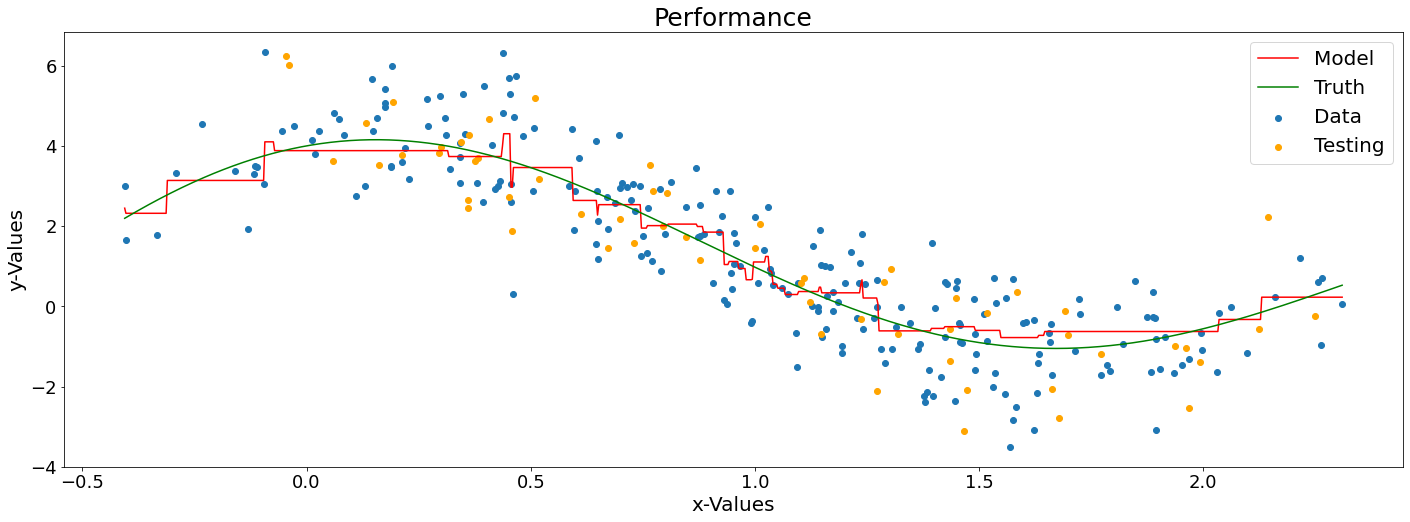

In [36]:
# Calculate optimal decision tree regression
X_model = np.linspace(np.min(x), np.max(x), 1000)
X_model = X_model.reshape((X_model.size,1))
y_model_pred = tuned_regressor.predict(X_model)
y_truth = np.cos(X_model)+2*np.sin(X_model)+3*np.cos(X_model*2)

# Plot the whole dataset
fig,ax=plt.subplots(figsize=(24,8))
ax.scatter(X_train, y_train, label='Data')
ax.scatter(X_test, y_test, color='orange', label='Testing')
ax.plot(X_model, y_model_pred, color='red', label='Model')
ax.plot(X_model, y_truth, color='green', label='Truth')
ax.set_xlabel('x-Values', fontsize=20)
ax.set_ylabel('y-Values', fontsize=20)
ax.set_title('Performance', fontsize=25)
ax.legend(loc='upper right', fontsize=20)
plt.show()

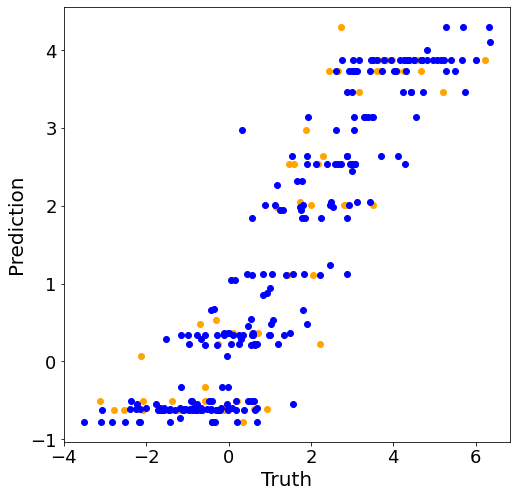

In [37]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(y_test, y_test_pred, color="orange")
ax.scatter(y_train, y_train_pred, color="blue")
ax.set_xlabel('Truth', fontsize=20)
ax.set_ylabel('Prediction', fontsize=20)
plt.show()